# Preprocessing of Twitter Data

In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import string
import re
import nltk
# nltk.download('stopwords')
# nltk.download('words')

Files below are zipped in twitter_stream_data, unzip and put into the correct directory if you want to use this notebook. Alternatively stream new data from Twitter Streaming API notebook, which will generate the 2 files and proceed.

In [3]:
positive_tweets_path = 'data/twitter_positive_sentiment_emoji.txt'
negative_tweets_path = 'data/twitter_negative_sentiment_emoji.txt'

positive_tweets_file = open(positive_tweets_path, 'r')
negative_tweets_file = open(negative_tweets_path, 'r')

In [4]:
def add_json_to_array(file):
    array = []
    for line in file:
        try:
            tweet = json.loads(line)
            array.append(tweet)
        except:
            continue
    return array

In [5]:
# reading in the data from the txt file and storing it in the respective arrays
tweets_data_positive = add_json_to_array(positive_tweets_file)
tweets_data_negative = add_json_to_array(negative_tweets_file)
# closing the txt files as they are no longer needed
positive_tweets_file.close()
negative_tweets_file.close()

In [6]:
# printing sizes of each dataset
print(len(tweets_data_positive), len(tweets_data_negative))

21429 21492


## Data Extraction
- Creating a dataframe for the positive and negative tweet classes
- From the entire json object I extract the following:
    - 'text'
    - 'fulltext'
    - 'language' (only consider english)

In [7]:
# tweets_data_positive[0]

In [8]:
tweets_postive = pd.DataFrame(tweets_data_positive)
tweets_negative = pd.DataFrame(tweets_data_negative)

In [8]:
# tweets_postive.info()

In [9]:
# positive extraction
tweets_postive = tweets_postive[['text', 'lang']]
# negative extraction
tweets_negative = tweets_negative[['text', 'lang']]

In [10]:
# tweets_postive.head()

In [11]:
# tweets_negative.head()

In [12]:
tweets_postive = tweets_postive[tweets_postive.lang == 'en']
tweets_negative = tweets_negative[tweets_negative.lang == 'en']

In [13]:
# tweets_postive.head()

In [14]:
# tweets_negative.head()

In [13]:
tweets_postive['class'] = 1
tweets_negative['class'] = 0

In [14]:
# tweets_postive.head()

In [15]:
# tweets_negative.head()

In [16]:
tweets = tweets_postive.copy()
tweets = tweets.append(tweets_negative, ignore_index=True)

In [17]:
tweets.head()

,text,lang,class
0,Big ol freak just make you wann twerk 😂,en,1
1,The rain thought it was slick 😂 i got my umbre...,en,1
2,RT @noahcent: I crack myself up dude 😂\n\nhttp...,en,1
3,BC I was feeling tf outta myself. 😌,en,1
4,RT @NBCSPhilly: Feeling ready to pop off. Lite...,en,1


In [18]:
tweets.tail()

,text,lang,class
18707,@MENA_Conflict I just hope his hatred skips a ...,en,0
18708,RT @sambu_sambu1: @Tu_Tumii My pastor should a...,en,0
18709,RT @kimpetras: I Can’t wait for you to see thi...,en,0
18710,"RT @kadeejra: Nigga, you built like groot. Put...",en,0
18711,@Thedoll22_ 😭 I lied lol I really don’t know w...,en,0


In [19]:
string_punc = string.punctuation.replace('@', '')
string_punc = string_punc.replace("'", '')
string_punc = string_punc.replace("#", '')
string_punc

'!"$%&()*+,-./:;<=>?[\\]^_`{|}~'

In [20]:
def remove_punc(text):
    text = ''.join([char for char in text if char not in string_punc])
#     text = re.sub('[0-9]+', '', text)
    return text
def remove_emoji(text):
    return text.encode('ascii', 'ignore').decode('ascii')
def remove_RT(text):
    text = re.sub('RT', '', text)
    return text
def remove_handle(text):
    text = ' '.join(re.sub('(@[A-Za-z0-9]+)|(@[^0-9A-Za-z \t])|(\w+:\/\/\S+)|(http[A-Za-z0-9]+)|', ' ', text).split()) 
    return text
def remove_hashtag(text):
    text = ' '.join(re.sub('(#[A-Za-z0-9]+)|(#[^0-9A-Za-z \t])|(\w+:\/\/\S+)', ' ', text).split()) 
    return text
def remove_non_english(text):
    words = set(nltk.corpus.words.words())
    words.add('thanos')
    text = ' '.join(word for word in nltk.wordpunct_tokenize(text) if word.lower() in words or not word.isalpha())
    return text

In [21]:
tweets['tweet_no_punc'] = tweets['text'].apply(lambda x: remove_punc(x))

In [22]:
col_list = list(tweets.columns)
col_new = [col_list[0], col_list[-1]] + col_list[1:-1]
# col_new
tweets = tweets[col_new]

In [23]:
tweets['tweet_no_punc'] = tweets['tweet_no_punc'].apply(lambda x: remove_emoji(x))
tweets.head()

,text,tweet_no_punc,lang,class
0,Big ol freak just make you wann twerk 😂,Big ol freak just make you wann twerk,en,1
1,The rain thought it was slick 😂 i got my umbre...,The rain thought it was slick i got my umbrel...,en,1
2,RT @noahcent: I crack myself up dude 😂\n\nhttp...,RT @noahcent I crack myself up dude \n\nhttpst...,en,1
3,BC I was feeling tf outta myself. 😌,BC I was feeling tf outta myself,en,1
4,RT @NBCSPhilly: Feeling ready to pop off. Lite...,RT @NBCSPhilly Feeling ready to pop off Litera...,en,1


In [24]:
tweets['tweet_no_punc'] = tweets['tweet_no_punc'].apply(lambda x: remove_RT(x))
tweets.head()

,text,tweet_no_punc,lang,class
0,Big ol freak just make you wann twerk 😂,Big ol freak just make you wann twerk,en,1
1,The rain thought it was slick 😂 i got my umbre...,The rain thought it was slick i got my umbrel...,en,1
2,RT @noahcent: I crack myself up dude 😂\n\nhttp...,@noahcent I crack myself up dude \n\nhttpstco...,en,1
3,BC I was feeling tf outta myself. 😌,BC I was feeling tf outta myself,en,1
4,RT @NBCSPhilly: Feeling ready to pop off. Lite...,@NBCSPhilly Feeling ready to pop off Literall...,en,1


In [25]:
tweets['tweet_no_punc'] = tweets['tweet_no_punc'].apply(lambda x: remove_handle(x))
tweets.head()

,text,tweet_no_punc,lang,class
0,Big ol freak just make you wann twerk 😂,Big ol freak just make you wann twerk,en,1
1,The rain thought it was slick 😂 i got my umbre...,The rain thought it was slick i got my umbrell...,en,1
2,RT @noahcent: I crack myself up dude 😂\n\nhttp...,I crack myself up dude,en,1
3,BC I was feeling tf outta myself. 😌,BC I was feeling tf outta myself,en,1
4,RT @NBCSPhilly: Feeling ready to pop off. Lite...,Feeling ready to pop off Literally Joel Embiid...,en,1


In [26]:
tweets['tweet_english'] = tweets['tweet_no_punc'].apply(lambda x: remove_non_english(x))

In [32]:
col_list = list(tweets.columns)
# col_list
col_new = [col_list[0], col_list[1], col_list[-1]] + col_list[2:-1]
# col_new
tweets = tweets[col_new]

In [33]:
tweets

,text,tweet_no_punc,tweet_english,lang,class
0,Big ol freak just make you wann twerk 😂,Big ol freak just make you wann twerk,Big freak just make you,en,1
1,The rain thought it was slick 😂 i got my umbre...,The rain thought it was slick i got my umbrell...,The rain thought it was slick i got my umbrell...,en,1
2,RT @noahcent: I crack myself up dude 😂\n\nhttp...,I crack myself up dude,I crack myself up dude,en,1
3,BC I was feeling tf outta myself. 😌,BC I was feeling tf outta myself,I was feeling myself,en,1
4,RT @NBCSPhilly: Feeling ready to pop off. Lite...,Feeling ready to pop off Literally Joel Embiid...,Feeling ready to pop off Literally is really o...,en,1
5,@UpadhyayaNikita do I REALLY need to? 😂,do I REALLY need to,do I REALLY need to,en,1
6,I like how she talk 😍,I like how she talk,I like how she talk,en,1
7,"my second mother’s day is coming up, 😍",my second mothers day is coming up,my second day is coming up,en,1
8,RT @YoungOnesGlobal: I miss this cutie pie 😍\n...,I miss this cutie pie TiffanyYoung YoungOneFor...,I miss this cutie pie,en,1
9,@fdoosey @thatkaylagirl_ @TypicalAussie30 @Jor...,I bet she is pretty cool Tessa would intimidat...,I bet she is pretty cool would intimidate me I...,en,1


(-0.5, 399.5, 199.5, -0.5)

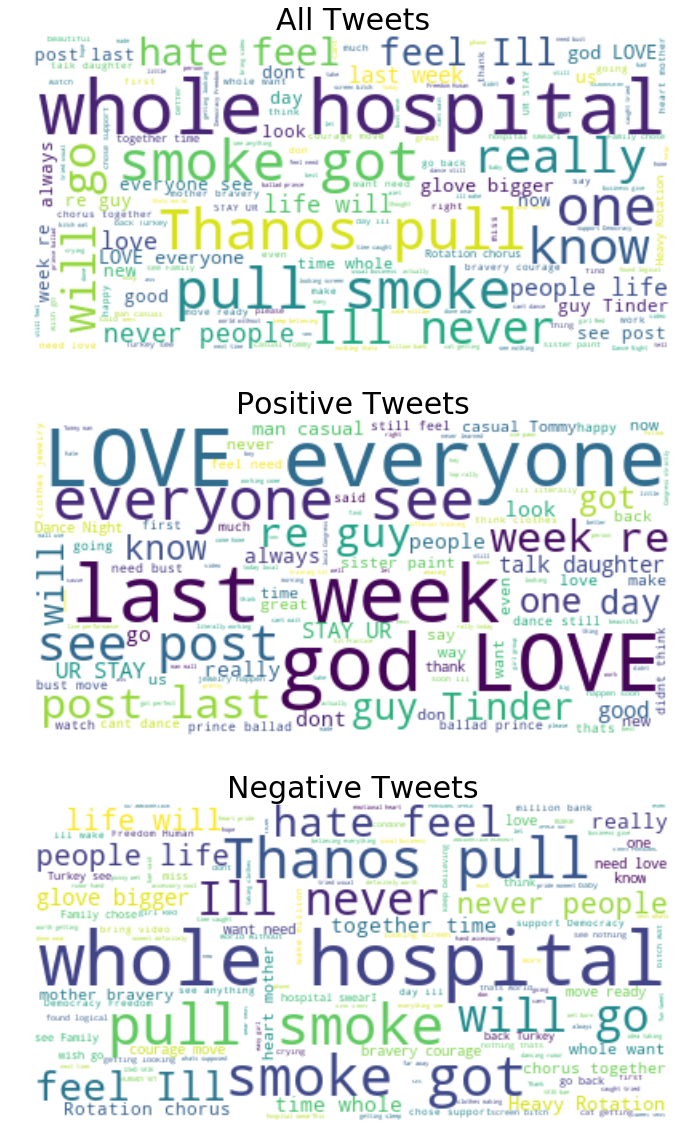

In [30]:
tweet_positive = ''.join(review for review in tweets.tweet_no_punc[tweets['class'] == 1])
tweet_negative = ''.join(review for review in tweets.tweet_no_punc[tweets['class'] == 0])
tweet_all = ''.join(review for review in tweets.tweet_no_punc)

fig, ax = plt.subplots(3, 1, figsize=(20, 20))
# generating word cloud image
word_cloud_all = WordCloud(max_font_size=50, max_words=200, background_color='white').generate(tweet_all)
word_cloud_positive = WordCloud(max_font_size=50, max_words=200, background_color='white').generate(tweet_positive)
word_cloud_negative = WordCloud(max_font_size=50, max_words=200, background_color='white').generate(tweet_negative)

# displaying the generated image
ax[0].imshow(word_cloud_all, interpolation='bilinear')
ax[0].set_title('All Tweets', fontsize=30)
ax[0].axis('off')
ax[1].imshow(word_cloud_positive, interpolation='bilinear')
ax[1].set_title('Positive Tweets', fontsize=30)
ax[1].axis('off')
ax[2].imshow(word_cloud_negative, interpolation='bilinear')
ax[2].set_title('Negative Tweets', fontsize=30)
ax[2].axis('off')

In [34]:
def tokenization(text):
    text = re.split('\W+', text)
    return text

In [50]:
tweets['tweet_token'] = tweets['tweet_english'].apply(lambda x: tokenization(x.lower()))
col_list = list(tweets.columns)
col_new = [col_list[0], col_list[1], col_list[2], col_list[-1]] + col_list[3:-1]

In [36]:
tweets = tweets[col_new]

In [51]:
tweets.head()

,text,tweet_no_punc,tweet_english,tweet_token,tweet,lang,class
0,Big ol freak just make you wann twerk 😂,Big ol freak just make you wann twerk,Big freak just make you,"[big, freak, just, make, you]","[big, freak, make]",en,1
1,The rain thought it was slick 😂 i got my umbre...,The rain thought it was slick i got my umbrell...,The rain thought it was slick i got my umbrell...,"[the, rain, thought, it, was, slick, i, got, m...","[rain, thought, slick, got, umbrella, bitch]",en,1
2,RT @noahcent: I crack myself up dude 😂\n\nhttp...,I crack myself up dude,I crack myself up dude,"[i, crack, myself, up, dude]","[crack, dude]",en,1
3,BC I was feeling tf outta myself. 😌,BC I was feeling tf outta myself,I was feeling myself,"[i, was, feeling, myself]",[feeling],en,1
4,RT @NBCSPhilly: Feeling ready to pop off. Lite...,Feeling ready to pop off Literally Joel Embiid...,Feeling ready to pop off Literally is really o...,"[feeling, ready, to, pop, off, literally, is, ...","[feeling, ready, pop, literally, really, center]",en,1


In [38]:
stopwords = nltk.corpus.stopwords.words('english')
# stopwords

In [39]:
def remove_stopwords(text):
    text = [word for word in text if word not in stopwords]
    return text

In [43]:
tweets['tweet'] = tweets['tweet_token'].apply(lambda x: remove_stopwords(x))

/home/rylan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [48]:
col_list = list(tweets.columns)
# col_list
col_new = [col_list[0], col_list[1], col_list[2], col_list[3], col_list[-1]] + col_list[4:-1]
# col_new
tweets = tweets[col_new]
tweets.columns = ['text', 'tweet_no_punc', 'tweet_english', 'tweet_token', 'tweet', 'lang', 'class']

In [52]:
tweets

,text,tweet_no_punc,tweet_english,tweet_token,tweet,lang,class
0,Big ol freak just make you wann twerk 😂,Big ol freak just make you wann twerk,Big freak just make you,"[big, freak, just, make, you]","[big, freak, make]",en,1
1,The rain thought it was slick 😂 i got my umbre...,The rain thought it was slick i got my umbrell...,The rain thought it was slick i got my umbrell...,"[the, rain, thought, it, was, slick, i, got, m...","[rain, thought, slick, got, umbrella, bitch]",en,1
2,RT @noahcent: I crack myself up dude 😂\n\nhttp...,I crack myself up dude,I crack myself up dude,"[i, crack, myself, up, dude]","[crack, dude]",en,1
3,BC I was feeling tf outta myself. 😌,BC I was feeling tf outta myself,I was feeling myself,"[i, was, feeling, myself]",[feeling],en,1
4,RT @NBCSPhilly: Feeling ready to pop off. Lite...,Feeling ready to pop off Literally Joel Embiid...,Feeling ready to pop off Literally is really o...,"[feeling, ready, to, pop, off, literally, is, ...","[feeling, ready, pop, literally, really, center]",en,1
5,@UpadhyayaNikita do I REALLY need to? 😂,do I REALLY need to,do I REALLY need to,"[do, i, really, need, to]","[really, need]",en,1
6,I like how she talk 😍,I like how she talk,I like how she talk,"[i, like, how, she, talk]","[like, talk]",en,1
7,"my second mother’s day is coming up, 😍",my second mothers day is coming up,my second day is coming up,"[my, second, day, is, coming, up]","[second, day, coming]",en,1
8,RT @YoungOnesGlobal: I miss this cutie pie 😍\n...,I miss this cutie pie TiffanyYoung YoungOneFor...,I miss this cutie pie,"[i, miss, this, cutie, pie]","[miss, cutie, pie]",en,1
9,@fdoosey @thatkaylagirl_ @TypicalAussie30 @Jor...,I bet she is pretty cool Tessa would intimidat...,I bet she is pretty cool would intimidate me I...,"[i, bet, she, is, pretty, cool, would, intimid...","[bet, pretty, cool, would, intimidate, know, say]",en,1


In [53]:
# writing dataframe to csv
tweets.to_csv(r'../data/tweets_pre_processed_clean.csv', index=None, header=True)